# O4

## Problem
DONE! - dataanalyse
<details>
<summary>
Bjarke need these links
</summary>


https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

https://www.analyticsvidhya.com/blog/2020/02/learn-image-classification-cnn-convolutional-neural-networks-3-datasets/

https://www.tensorflow.org/tutorials/images/classification

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

## Ways to build 

```
model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
```
</details>

## Datasæt 
DONE! - dataanalyse

# Valg af ML
* Bruger supervised learning
* Bruger CNN da det er billede data
* Bruger categorical_crossentropy algorith, da vi har flere kategorier eller SparseCategoricalCrossentropy
* Maybe need preprocessed
* Hvordan forholder vi os til over and underfitting
* RandomGridSearch?

## Håndtering af optimering, fordele og ulemper 
* Overfitting/underfitting
* Optimeringsparametre, hyperparameterrummet 
* 






# Load The Data

In [76]:
from keras.preprocessing.image import ImageDataGenerator

def data_augmentation(categories: list, folder: str, batch_size: int):
    datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    generator = datagen.flow_from_directory(
        folder,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',  # Assuming you're using categorical crossentropy
        classes=categories
    )

    return generator


In [72]:
import cv2, os
from PIL import Image
import numpy as np

def getDataSet(categories: list, folder: str):
    images = []
    labels = []
    for category in categories:
        folder_path = os.path.join(folder, category)
        label = categories.index(category)  # Assign a numerical label to each category
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpg"):
                img_path = os.path.join(folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize to a common size
                    img = img / 255.0  # Normalize pixel values to [0, 1]
                    images.append(img)
                    labels.append(label)
                else:
                    print(f"Failed to load image: {img_path}")
    return np.array(images), np.array(labels)

# Create histograms

In [82]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

data_folder = "weather_dataset"
categories = ["Shine", "Cloudy", "Rain", "Sunrise"]

#X is images
#y is labels

X, y = getDataSet(categories, data_folder)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Use the data_augmentation function to create an augmented data generator
print(len(X_train))
batch_size = 32
augmented_data_generator = data_augmentation(categories, data_folder, batch_size)
X_train= np.concatenate((X_train, augmented_data_generator))
print(len(X_train))


# Separate the indices for each category
category_indices = [np.where(y == i)[0][0] for i in range(len(categories))]

# Display one image from each category
plt.figure(figsize=(15, 5))
for i, category_index in enumerate(category_indices):
    plt.subplot(1, len(categories), i + 1)
    image = X[category_index]
    plt.imshow(image)
    plt.title(categories[i])
    plt.axis('off')
plt.show()

# Assuming 'labels' is a list or NumPy array of category labels
# You can create histograms of the labels to visualize the class distribution
plt.hist(y, bins=len(np.unique(y)))  # Use as many bins as unique labels
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(np.unique(y))  # Set x-ticks to unique class labels
plt.show()

Failed to load image: weather_dataset\Shine\shine131.jpg
Failed to load image: weather_dataset\Rain\rain141.jpg
896
Found 1125 images belonging to 4 classes.


OSError: broken data stream when reading image file

# Check the shapes

In [74]:
from tensorflow.keras.utils import to_categorical

def checkShapeBeforeReshape(X_train, y_train, X_test, y_test):
    print("X_train shape before reshape:", X_train.shape)
    print("X_test shape before reshape:", X_test.shape)

    print("y_categotical_train shape before reshape:", y_train.shape)
    print("y_categotical_test shape before reshape:", y_test.shape)


def reshape(X_train, y_train, X_test, y_test):
    X_train = X_train.reshape((X_train.shape[0], 224, 224, 3)).astype('float32') / 255.0
    X_test = X_test.reshape((X_test.shape[0], 224, 224, 3)).astype('float32') / 255.0
    print("X_train shape after reshape:", X_train.shape)
    print("X_test shape after reshape:", X_test.shape)

    if y_train.ndim == 1 or y_test.ndim == 1:
        y_train = to_categorical(y_train, num_classes=4)
        y_test = to_categorical(y_test, num_classes=4)
    print("y_categotical_train shape after reshape:", y_train.shape)
    print("y_categotical_test shape after reshape:", y_test.shape)
    return X_train, y_train, X_test, y_test

checkShapeBeforeReshape(X_train, y_train, X_test, y_test)

X_train, y_train, X_test, y_test = reshape(X_train, y_train, X_test, y_test)

X_train shape before reshape: (896, 224, 224, 3)
X_test shape before reshape: (224, 224, 224, 3)
y_categotical_train shape before reshape: (896,)
y_categotical_test shape before reshape: (224,)
X_train shape after reshape: (896, 224, 224, 3)
X_test shape after reshape: (224, 224, 224, 3)
y_categotical_train shape after reshape: (896, 4)
y_categotical_test shape after reshape: (224, 4)


# Create function for later use

In [48]:
def plot_metrics(train_losses, train_accuracies):
    # Format data to np.array for easier use
    train_losses = np.array(train_losses)
    train_accuracies = np.array(train_accuracies)
    
    # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(np.mean(train_losses, axis=0), label='Training Loss')
    plt.title('Training Loss Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(np.mean(train_accuracies, axis=0), label='Training Accuracy')
    plt.title('Training Accuracy Over Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_folds(test_accuracies):
     # Plot Training Loss
    plt.subplot(1, 2, 1)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Test Accuracy Over Iterations')
    plt.xlabel('KFolds')
    plt.ylabel('Loss')
    plt.legend()

def plot_generalization(n_epochs, folds, val_errors_list, train_errors_list):
    
    for i in range(folds):
        best_epoch = np.argmin(val_errors_list[i])
        best_val_rmse = np.sqrt(val_errors_list[i][best_epoch])

        # plt.figure(figsize=(10,5))
        # plt.annotate('Best model',
        #              xy=(best_epoch, best_val_rmse),
        #              xytext=(best_epoch, best_val_rmse + 1),
        #              ha="center",
        #              arrowprops=dict(facecolor='black', shrink=0.05),
        #              fontsize=16,
        #             )

        # for i in range(n_epochs):
        #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
        
        #best_val_rmse -= 0.03  # just to make the graph look better
        plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
        plt.plot(np.sqrt(train_errors_list[i]), "b--", linewidth=2, label="Training set")
        plt.plot(np.sqrt(val_errors_list[i]), "g-", linewidth=3, label="Validation set")
        plt.legend(loc="upper right", fontsize=14)
        plt.xlabel("Epoch", fontsize=14)
        plt.ylabel("RMSE", fontsize=14)
        plt.show()

def plot_generalization_kfold(folds, val_errors_list, train_errors_list):
    best_kfold = np.argmin(val_errors_list)
    best_val_rmse = np.sqrt(val_errors_list[best_kfold])

    # plt.figure(figsize=(10,5))
    # plt.annotate('Best model',
    #              xy=(best_epoch, best_val_rmse),
    #              xytext=(best_epoch, best_val_rmse + 1),
    #              ha="center",
    #              arrowprops=dict(facecolor='black', shrink=0.05),
    #              fontsize=16,
    #             )

    # for i in range(n_epochs):
    #     print(f"  epoch={i:4d}, mse_train={train_errors_list[i][i]:4.2f}, mse_val={val_errors_list[i][i]:4.2f}")
    
    #best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, folds], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(train_errors_list), "b--", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors_list), "g-", linewidth=3, label="Validation set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Kfold", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.show()

def print_Average(test_accuracy, loss_per_fold):
    # Print out average value for the model
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')

# Generate Model

Here we define our different models we wnat to test

#### This is our first own model

In [42]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential 

def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), padding="same", activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), padding="same", activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5)),
    model.add(Dense(4, activation='softmax'))  # Change to 4 for your 4 classes

    # Plot the model
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


#### Model from the book
We have to make something like this model...  I (Bjarke) am going to test this

In [52]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.random import set_seed
from tensorflow.keras.models import Sequential 

from functools import partial

def createModelFromBook():
    #set_seed(42)  # extra code – ensures reproducibility
    DefaultConv2D = partial(Conv2D, kernel_size=3, padding="same",
                            activation="relu", kernel_initializer="he_normal")
    model = Sequential([
        DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
        MaxPooling2D(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        MaxPooling2D(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        MaxPooling2D(),
        Flatten(),
        Dense(units=128, activation="relu",
                            kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(units=64, activation="relu",
                            kernel_initializer="he_normal"),
        Dropout(0.5),
        Dense(units=4, activation="softmax")
    ])
    # Plot the model
    plot_model(model, to_file='model_plot_from_book.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [64]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

def alexnet():
    model = Sequential()

    # Layer 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3), padding='valid'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 2
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Layer 3
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Layer 4
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Layer 5
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(BatchNormalization())

    # Flatten the output and add fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(4, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Assuming input shape of (224, 224, 3) and 1000 classes
# input_shape = (224, 224, 3)
# num_classes = 1000

# model = alexnet(input_shape, num_classes)
# model.summary()


# Train the model For normal cnn

# Train and evaluate model
Here we create a default set up we are using for each model. We are injecting the model we want to use. This way it is easy to test different models and have to copy paste alot less.

For genderate the picture you have too run the commands:
```
pip install graphiz 
pip install pydot
```

#### Model checking every epochs

In [67]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        model = createModel()
        kfold_index = kfold_index + 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        fold_train_losses, fold_train_accuracies = [], []
        fold_train_errors, fold_val_errors = [], []  # List to store train errors/validation for the current fold

        for epoch in range(n_epochs): 
            history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

            fold_train_losses.append(history.history['loss'][0])
            fold_train_accuracies.append(history.history['accuracy'][0])

            # Predict training data
            y_train_pred = model.predict(X_train_kfold, verbose=0)
            mse_train = mean_squared_error(y_train_kfold, y_train_pred)
            fold_train_errors.append(mse_train)

            # Evalutate the model on the validation set
            test_loss, test_accuracy = model.evaluate(X_val_kfold, y_val_kfold)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Predict validate data
            y_val_pred = model.predict(X_val_kfold, verbose=0)
            mse_val = mean_squared_error(y_val_kfold, y_val_pred)
            fold_val_errors.append(mse_val)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model
                best_model_info = f'Kfold: {kfold_index}, Epoch: {epoch}'

        train_losses.append(fold_train_losses)
        train_accuracies.append(fold_train_accuracies)
        train_errors_list.append(fold_train_errors)
        val_errors_list.append(fold_val_errors)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    plot_generalization(n_epochs, folds, val_errors_list, train_errors_list)

    print(best_model_info)

    return best_model


def evalute_model(model):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    print('------------------------------------------------------------------------')


#### Model for kfolds

In [2]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(createModel, X_train, y_train, folds, n_epochs):
    kfold = StratifiedKFold(n_splits=folds, shuffle=True)

    test_accuracies, test_losses, train_accuracies, train_losses = [], [], [], []
    train_errors_list, val_errors_list = [], []  # List to store train/validation errors for each fold

    best_model = None
    best_val_loss = float('inf')
    best_model_info = ""
    kfold_index = 0

    for train, val in kfold.split(X_train, y_train.argmax(1)):
        print(X_train)
        print(y_train)
        model = createModel()
        kfold_index = kfold_index + 1

        X_train_kfold, X_val_kfold = X_train[train], X_train[val]
        y_train_kfold, y_val_kfold = y_train[train], y_train[val]

        fold_train_losses, fold_train_accuracies = [], []
        fold_train_errors, fold_val_errors = [], []  # List to store train errors/validation for the current fold

        for epoch in range(n_epochs): 
            history = model.fit(X_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

            fold_train_losses.append(history.history['loss'][0])
            fold_train_accuracies.append(history.history['accuracy'][0])

            # Evalutate the model on the validation set
            test_loss, test_accuracy = model.evaluate(X_val_kfold, y_val_kfold)
            test_accuracies.append(test_accuracy)
            test_losses.append(test_loss)

            # Check if the current model has the lowest validation loss
            if test_loss < best_val_loss:
                best_val_loss = test_loss
                best_model = model
                best_model_info = f'Kfold: {kfold_index}, Epoch: {epoch}'
        
        # Predict training data
        y_train_pred = model.predict(X_train_kfold, verbose=0)
        mse_train = mean_squared_error(y_train_kfold, y_train_pred)
        fold_train_errors.append(mse_train)

        # Predict validate data
        y_val_pred = model.predict(X_val_kfold, verbose=0)
        mse_val = mean_squared_error(y_val_kfold, y_val_pred)
        fold_val_errors.append(mse_val)        

        train_losses.append(fold_train_losses)
        train_accuracies.append(fold_train_accuracies)
        train_errors_list.append(fold_train_errors)
        val_errors_list.append(fold_val_errors)

    print_Average(test_accuracies, test_losses)

    plot_metrics(train_losses, train_accuracies)

    # Plot generalization errors for each fold
    plot_generalization_kfold(folds, val_errors_list, train_errors_list)

    print(best_model_info)

    return best_model


def evalute_model(model):
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(test_accuracy)} (+- {np.std(test_accuracy)})')
    print(f'> Loss: {np.mean(test_loss)}')
    print('------------------------------------------------------------------------')

## Test models

### Test own first model
I know this is a stupid name for this section, but it is just for have multiple test in this file and later on can delete the model we don't wont to use.

14/14 [==============================] - 3s 216ms/step - loss: 1.3650 - accuracy: 0.3281
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.328125 (+- 0.0)
> Loss: 1.3707379698753357


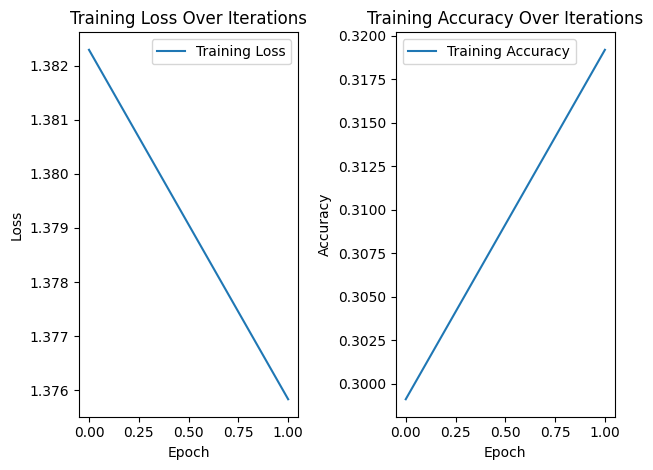

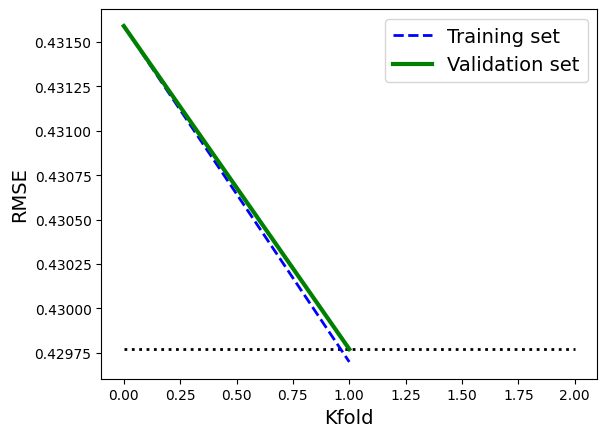

Kfold: 2, Epoch: 1
7/7 [==============================] - 1s 198ms/step - loss: 1.3714 - accuracy: 0.2768
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.2767857015132904 (+- 0.0)
> Loss: 1.3713979721069336
------------------------------------------------------------------------


In [54]:
model = train_and_evaluate_model(createModel, X_train, y_train, folds=2, n_epochs=2)
evalute_model(model)

### Model from the book

14/14 [==============================] - 4s 309ms/step - loss: 0.4378 - accuracy: 0.8482
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.7072823658585549 (+- 0.11165442123195328)
> Loss: 0.7265915237367153


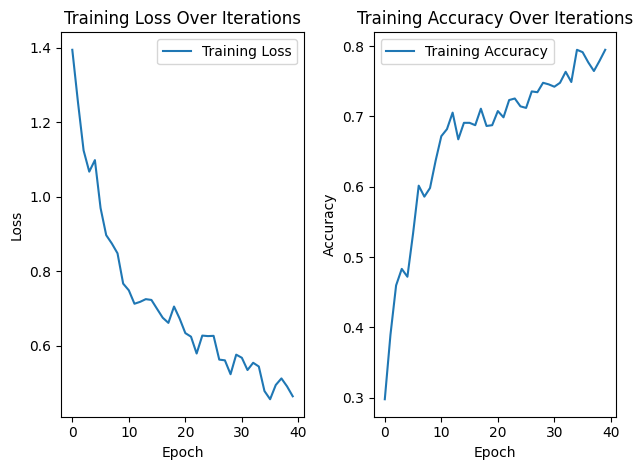

  epoch=   0, mse_train=0.18, mse_val=0.18
  epoch=   1, mse_train=0.16, mse_val=0.17
  epoch=   2, mse_train=0.17, mse_val=0.17
  epoch=   3, mse_train=0.15, mse_val=0.15
  epoch=   4, mse_train=0.13, mse_val=0.13
  epoch=   5, mse_train=0.12, mse_val=0.12
  epoch=   6, mse_train=0.12, mse_val=0.13
  epoch=   7, mse_train=0.11, mse_val=0.12
  epoch=   8, mse_train=0.11, mse_val=0.11
  epoch=   9, mse_train=0.09, mse_val=0.10
  epoch=  10, mse_train=0.09, mse_val=0.09
  epoch=  11, mse_train=0.08, mse_val=0.09
  epoch=  12, mse_train=0.09, mse_val=0.09
  epoch=  13, mse_train=0.10, mse_val=0.11
  epoch=  14, mse_train=0.09, mse_val=0.10
  epoch=  15, mse_train=0.10, mse_val=0.11
  epoch=  16, mse_train=0.08, mse_val=0.08
  epoch=  17, mse_train=0.08, mse_val=0.09
  epoch=  18, mse_train=0.09, mse_val=0.10
  epoch=  19, mse_train=0.09, mse_val=0.10
  epoch=  20, mse_train=0.09, mse_val=0.10
  epoch=  21, mse_train=0.07, mse_val=0.08
  epoch=  22, mse_train=0.07, mse_val=0.09
  epoch=  2

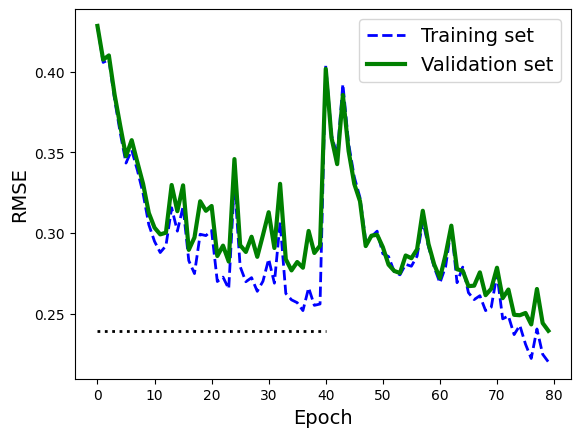

Kfold: 2, Epoch: 39
7/7 [==============================] - 2s 312ms/step - loss: 0.4240 - accuracy: 0.8259
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 0.8258928656578064 (+- 0.0)
> Loss: 0.42395421862602234
------------------------------------------------------------------------


In [ ]:
model = train_and_evaluate_model(createModelFromBook, X_train, y_train, folds=2, n_epochs=40)
evalute_model(model)

### AlexNet

In [68]:
#alexnetModel = alexnet((224, 224, 3), 4)
model = train_and_evaluate_model(alexnet, X_train, y_train, folds=2, n_epochs=25)
evalute_model(model)

14/14 [==============================] - 2s 140ms/step - loss: 2.8306 - accuracy: 0.1964


KeyboardInterrupt: 

# Try to combine models

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
# y_train_categorical = to_categorical(y_train_encoded)
# y_test_categorical = to_categorical(y_test_encoded)

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4,activation='sigmoid',name='fc4'))
model.compile(loss="categorical_crossentropy", optimizer="adam")

# Extract features using the CNN
model.fit(X,y, epochs=10)
model.pop() # this will remove the last layer
model.summary() # check the network 

# Create and train SVM model
feature_mapping = model(X) 
clf = SVC()
clf.fit(feature_mapings, y)
# Evaluate the SVM model
#test_accuracy = SVC.score(X_test_features, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')


# Plot Training Accuracy
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy Over Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10


ValueError: in user code:

    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\Bjark\source\repos\MAL\MAL_V11\Lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 4) are incompatible


## Second attempt

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))

# Create CNN model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(4, activation='softmax', name='fc4'))
cnn_model.compile(loss="categorical_crossentropy", optimizer="adam")

# Extract features using the CNN
cnn_model.fit(X_train, to_categorical(y_train_encoded), epochs=10)
cnn_model.pop()  # this will remove the last layer
cnn_model.summary()  # check the network

# Create and train SVM model
print(f'Now we testing the SVC model')
feature_mappings = cnn_model.predict(X_train)
clf = SVC()
clf.fit(feature_mappings, y_train_encoded)
clf.predict(X_train)


# Evaluate the SVM model
test_feature_mappings = clf.predict(X_test)
test_accuracy = clf.score(test_feature_mappings, y_test_encoded)
print(f'Test Accuracy: {test_accuracy}')



# Plot Training Accuracy
plt.plot(test_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy Over Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


ValueError: y should be a 1d array, got an array of shape (896, 4) instead.

## Thrid attempt

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, y_train, X_test, y_test are your image and label data

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(np.argmax(y_train, axis=1))
y_test_encoded = label_encoder.transform(np.argmax(y_test, axis=1))

# Convert labels to categorical
y_categotical_train = to_categorical(y_train)
y_categotical_test = to_categorical(y_test)

# Create CNN model
def create_cnn_model():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='relu'))
    cnn_model.add(Dropout(0.5))
    cnn_model.add(Dense(4, activation='softmax', name='fc4'))
    cnn_model.compile(loss="categorical_crossentropy", optimizer="adam")
    return cnn_model

# Wrap the Keras model with KerasClassifier
cnn_classifier = KerasClassifier(build_fn=create_cnn_model, epochs=10, verbose=1)

# Create SVM model
svm_model = SVC()

# Create a pipeline with CNN feature extraction and SVM training
pipeline = Pipeline([
    ('cnn', cnn_classifier),
    ('scaler', StandardScaler()),
    ('svm', svm_model)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_categotical_train)

# Evaluate the pipeline on the test data
test_accuracy = pipeline.score(X_test, y_categotical_test)
print(f'Test Accuracy: {test_accuracy}')


ValueError: y should be a 1d array, got an array of shape (896, 4) instead.